Exercise 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2020)

# Exercise H7.1 Training Data

In [3]:
def generate_sample_true(n):
    myu_1 = np.array([0,1])
    myu_2 = np.array([1,0])
    cov = np.eye(2) * 0.1
    d1 = np.random.multivariate_normal(mean = myu_1 , cov=cov, size=n)
    d2 = np.random.multivariate_normal(mean = myu_2 , cov=cov, size=n)
    
    idx = np.random.choice([0, 1], size=n)
    idx_left = np.where(idx==1)[0]
    idx_right = np.where(idx==0)[0]
    
    d1 = d1.take(idx_left, axis=0)
    d2 = d2.take(idx_right, axis=0)
    
    return np.concatenate((d1.T, d2.T), axis=1)

In [4]:
def generate_sample_false(n):
    myu_1 = np.array([0,0])
    myu_2 = np.array([1,1])
    cov = np.eye(2) * 0.1
    d1 = np.random.multivariate_normal(mean = myu_1 , cov=cov, size=n)
    d2 = np.random.multivariate_normal(mean = myu_2 , cov=cov, size=n)
    
    idx = np.random.choice([0, 1], size=n)
    idx_left = np.where(idx==1)[0]
    idx_right = np.where(idx==0)[0]
    
    d1 = d1.take(idx_left, axis=0)
    d2 = d2.take(idx_right, axis=0)
    
    return np.concatenate((d1.T, d2.T), axis=1)

In [5]:
def to_onehot(data):
    shape = (data.max()+1, data.size)
    one_hot = np.zeros(shape)
    rows = np.arange(data.size)
    one_hot[data, rows] = 1
    return one_hot

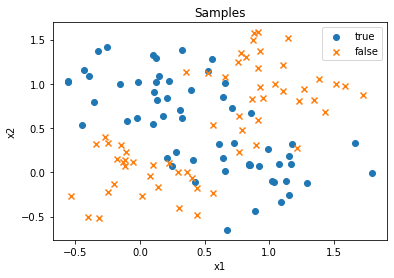

In [6]:
n_true = 60
n_false = 60

x_true = generate_sample_true(n_true)
x_false = generate_sample_false(n_false)

x_train = np.concatenate((x_true, x_false), axis=1)

y_true = np.ones(n_true)
y_false = np.zeros(n_false)

y_train = np.concatenate((y_true, y_false), axis=0)
y_train = y_train.reshape((1,-1)).astype(int)

y_train_one_hot = to_onehot(y_train)

plt.scatter(x = x_true[0,:], y = x_true[1,:], marker='o', label='true')
plt.scatter(x = x_false[0,:], y = x_false[1,:], marker='x', label='false')

plt.legend()

plt.title('Samples')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

# Exercise H7.2 kNN

In [7]:
def k_nearest(x, x_train, y_train, k, to_onehot=False):
    ret = np.zeros(x.shape[1])
    for i in range (x.shape[1]):
        #computing euclidean distance
        temp_x = x[:,[i]]
        dist = np.sqrt(np.sum((x_train - temp_x)**2, axis=0))
        #getting bottom k
        bottom_k_idx = dist.argsort()[:k]
        y_k = y_train.take(bottom_k_idx, axis=1)
        avg = np.mean(y_k, axis=1)
        ret[i]=np.argmax(avg)
    if to_onehot:
        return to_onehot(ret.astype(int))
    else:
        return ret.astype(int)

In [8]:
x1 = np.linspace(-0.5,1.5,100)
x_test = np.array(np.meshgrid(x1,x1)).reshape(2,-1)

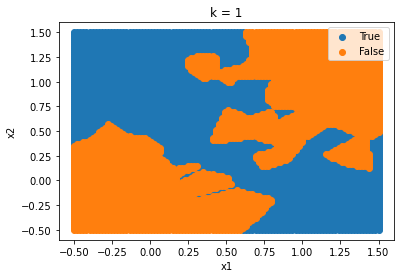

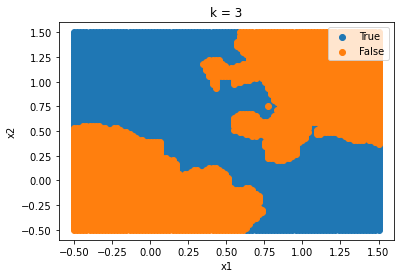

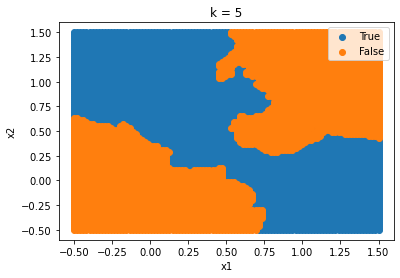

In [9]:
ks = [1,3,5]

for k in ks:
    res = k_nearest(x_test, x_train, y_train_one_hot, k)
    true_test = x_test.take(np.where(res==1), axis=1).reshape((x_test.shape[0],-1))
    false_test = x_test.take(np.where(res==0), axis=1).reshape((x_test.shape[0],-1))
    
    plt.title('k = {}'.format(k))
    plt.scatter(true_test[0], true_test[1],label='True')
    plt.scatter(false_test[0], false_test[1], label='False')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Exercise H7.3 Parzen Window

## a

In [10]:
def get_kernel(x, x_train, var):
    dist =np.sum((x_train - x)**2, axis=0)
    kernel = np.exp(-0.5 *dist / var)
    
    return kernel

In [11]:
def parzen_windows(x, x_train, y_train, var, to_onehot=False):
    ret = np.zeros(x.shape[1])
    for i in range (x.shape[1]):
        #computing euclidean distance
        temp_x = x[:,[i]]
        kernel = get_kernel(temp_x, x_train, var)
        weighted = np.multiply(kernel, y_train)
        #getting bottom k)
        summed = np.sum(weighted, axis=1)
        ret[i]=np.argmax(summed)
    if to_onehot:
        return to_onehot(ret.astype(int))
    else:
        return ret.astype(int)

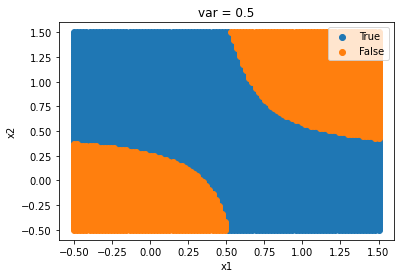

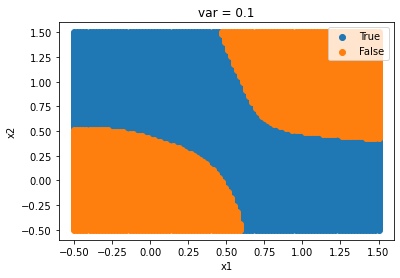

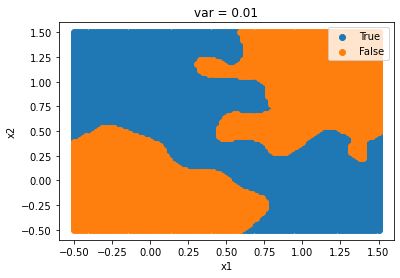

In [12]:
varss = [0.5, 0.1, 0.01]
for var in varss:
    res = parzen_windows(x_test, x_train, y_train_one_hot, var)
    true_test = x_test.take(np.where(res==1), axis=1).reshape((x_test.shape[0],-1))
    false_test = x_test.take(np.where(res==0), axis=1).reshape((x_test.shape[0],-1))
    
    plt.title('var = {}'.format(var))
    plt.scatter(true_test[0], true_test[1],label='True')
    plt.scatter(false_test[0], false_test[1], label='False')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

## b

In [13]:
def generate_mid_sample(n):
    myu_1 = np.array([0.5,0.5])
    cov = np.eye(2) * 0.05
    d1 = np.random.multivariate_normal(mean = myu_1 , cov=cov, size=n)
    return d1.T

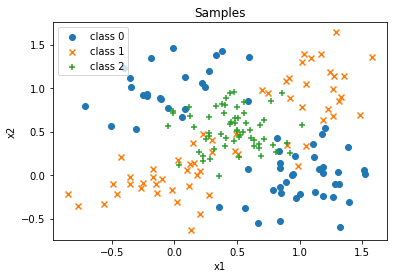

In [14]:
n_1 = 60
n_2 = 60
n_3 = 60
x_1 = generate_sample_true(n_1)
x_2 = generate_sample_false(n_2)
x_3 = generate_mid_sample(n_3)

x_train_2 = np.concatenate((x_1, x_2, x_3), axis=1)

y_1 = np.ones(n_1)
y_2 = np.zeros(n_2)
y_3 = np.full(n_3,2)

y_train_2 = np.concatenate((y_1, y_2, y_3), axis=0)
y_train_2 = y_train_2.reshape((1,-1)).astype(int)

y_train_one_hot_2 = to_onehot(y_train_2)

plt.scatter(x = x_1[0,:], y = x_1[1,:], marker='o', label='class 0')
plt.scatter(x = x_2[0,:], y = x_2[1,:], marker='x', label='class 1')
plt.scatter(x = x_3[0,:], y = x_3[1,:], marker='+', label='class 2')

plt.legend()

plt.title('Samples')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

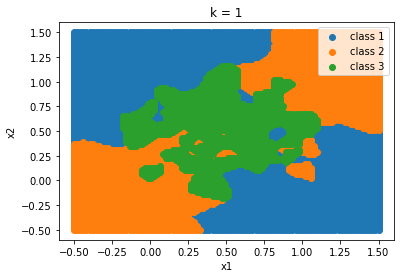

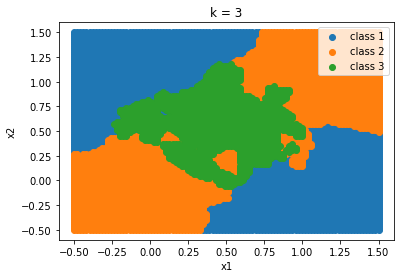

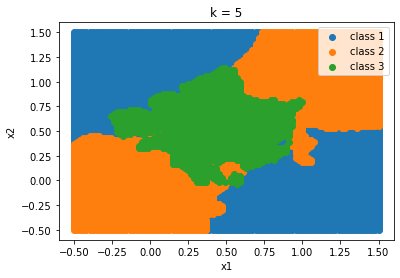

In [15]:
ks = [1,3,5]

for k in ks:
    res = k_nearest(x_test, x_train_2, y_train_one_hot_2, k)
    true_test = x_test.take(np.where(res==1), axis=1).reshape((x_test.shape[0],-1))
    false_test = x_test.take(np.where(res==0), axis=1).reshape((x_test.shape[0],-1))
    mid_test = x_test.take(np.where(res==2), axis=1).reshape((x_test.shape[0],-1))
    
    plt.title('k = {}'.format(k))
    plt.scatter(true_test[0], true_test[1],label='class 1')
    plt.scatter(false_test[0], false_test[1], label='class 2')
    plt.scatter(mid_test[0], mid_test[1], label='class 3')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

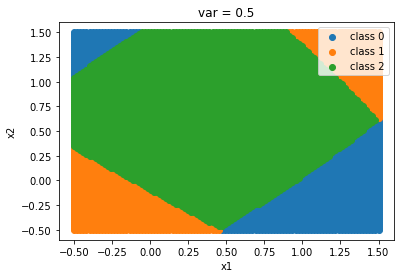

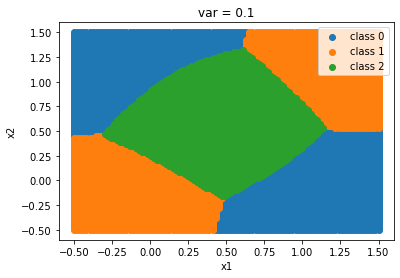

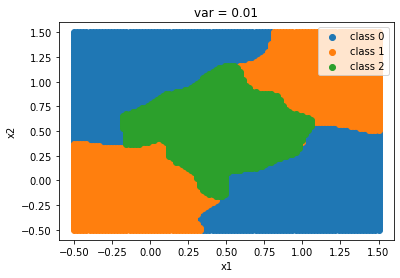

In [16]:
varss = [0.5, 0.1, 0.01]
for var in varss:
    res = parzen_windows(x_test, x_train_2, y_train_one_hot_2, var)
    test_1 = x_test.take(np.where(res==1), axis=1).reshape((x_test.shape[0],-1))
    test_2 = x_test.take(np.where(res==0), axis=1).reshape((x_test.shape[0],-1))
    test_3 = x_test.take(np.where(res==2), axis=1).reshape((x_test.shape[0],-1))
   
    plt.title('var = {}'.format(var))
    plt.scatter(test_1[0], test_1[1],label='class 0')
    plt.scatter(test_2[0], test_2[1], label='class 1')
    plt.scatter(test_3[0], test_3[1], label='class 2')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc=1)
    plt.show()

# Exercise H7.3 RBF Networks

In [17]:
from sklearn.cluster import KMeans

In [32]:
def rbf_feature_transform(x_train, centroids, var):    
    ret = np.zeros(x_train.shape[1])
    phis=[]
    for i in range (x_train.shape[1]):
        temp_x = x_train[:,[i]]
        k = get_kernel(temp_x, centroids, var)
        phi = np.insert(k,0,1)
        phis.append(phi)
    phis = np.array(phis).T
    
    return phis

In [35]:
def rbf_networks(x, x_train, y_train, centroids, var, to_onehot=False):
            
    phis = rbf_feature_transform(x_train, centroids, var)
    
    w = np.linalg.inv(phis@phis.T)
    w = w@phis@y_train.T
    
    #predicting
    
    phis_test = rbf_feature_transform(x, centroids, var)
    res_test = w.T @ phis_test
    
    res_test[res_test >= 0.5] = 1
    res_test[res_test < 0.5] = 0
    
    if to_onehot:
        return to_onehot(res_test.astype(int))
    else:
        return res_test.astype(int)    

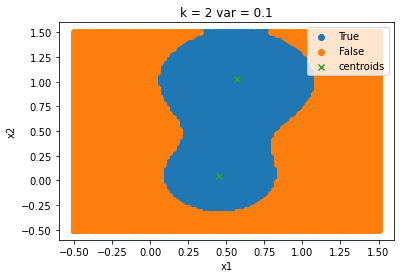

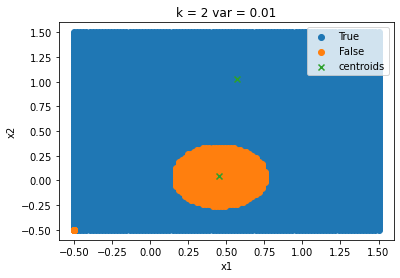

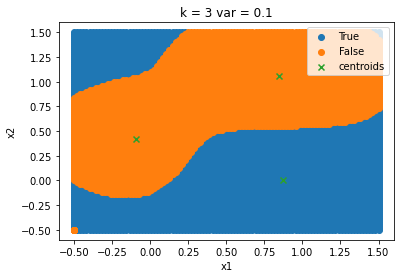

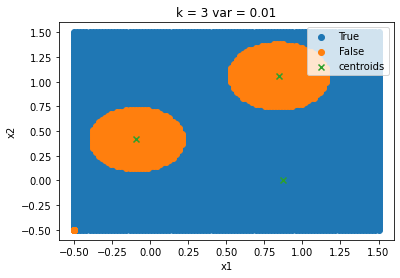

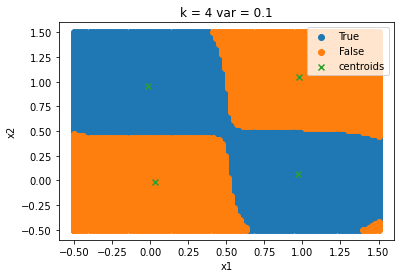

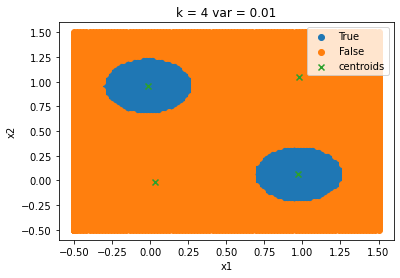

In [36]:
ks = [2,3,4]
varss = [0.1, 0.01]
for k in ks:
    for var in varss:  
        kmeans = KMeans(n_clusters = k, random_state = 0).fit(x_train.T)    
        centroids = kmeans.cluster_centers_.T
        res = rbf_networks(x_test, x_train, y_train, centroids=centroids, var = var)
        true_test = x_test.take(np.where(res==1), axis=1).reshape((x_test.shape[0],-1))
        false_test = x_test.take(np.where(res==0), axis=1).reshape((x_test.shape[0],-1))

        plt.title('k = {}'.format(k) + ' var = {}'.format(var))
        plt.scatter(true_test[0], true_test[1],label='True')
        plt.scatter(false_test[0], false_test[1], label='False')
        plt.scatter(centroids[0], centroids[1], marker='x', label='centroids')
        
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.show()

## B

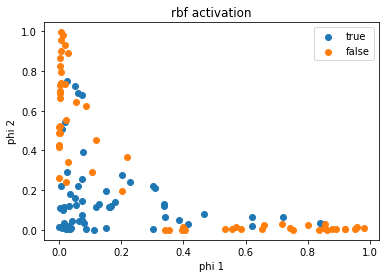

In [74]:
centroids = np.array([[0,0],[1,1]]).T
var = 0.2

phis = rbf_feature_transform(x_train, centroids, var)
test_true = phis.take(np.where(y_train.ravel()==1), axis=1).reshape((phis.shape[0],-1))
test_false = phis.take(np.where(y_train.ravel()==0), axis=1).reshape((phis.shape[0],-1))
plt.title('rbf activation')
plt.scatter(test_true[1,:], test_true[2,:], label='true')
plt.scatter(test_false[1,:], test_false[2,:], label='false')
plt.xlabel('phi 1')
plt.ylabel('phi 2')

plt.legend()
plt.show()

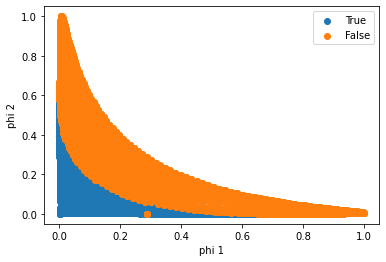

In [75]:
y_test = rbf_networks(x_test, x_train, y_train, centroids=centroids, var = var)

phis = rbf_feature_transform(x_test, centroids, var)
true_test = phis.take(np.where(res==1), axis=1).reshape((phis.shape[0],-1))
false_test = phis.take(np.where(res==0), axis=1).reshape((phis.shape[0],-1))

plt.scatter(true_test[1,:], true_test[2,:], label='True')
plt.scatter(false_test[1,:], false_test[2,:], label='False')

plt.xlabel('phi 1')
plt.ylabel('phi 2')
plt.legend()
plt.show()